In [11]:
import os
import tarfile
from six.moves import urllib

### Download and unzip

In [243]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [244]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    housing_url=HOUSING_URL
    housing_path = HOUSING_PATH
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [245]:
fetch_housing_data()

### Load data

In [246]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [247]:
housing=load_housing_data()

In [248]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### NA value count according to columns

almost no na values

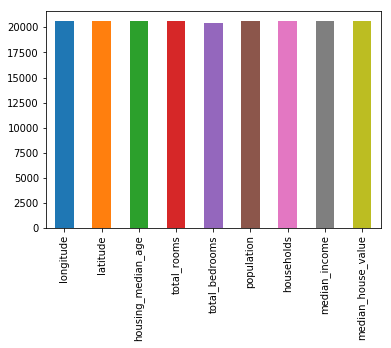

In [249]:
housing.describe().loc['count'].plot(kind='bar')

almost no columns have high NA values

### count oceanproximity value

In [250]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAD33A2860>,
      dtype=object)

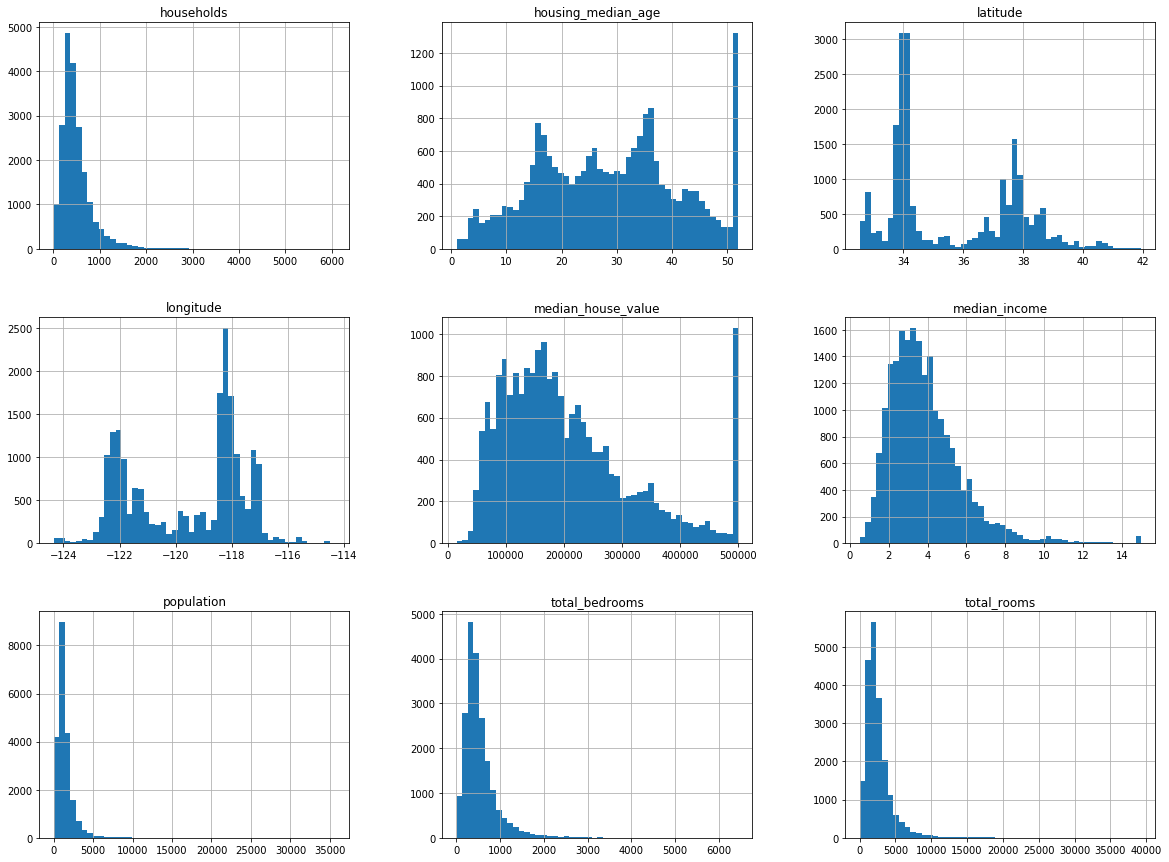

In [252]:
housing.hist(bins=50, figsize=(20,15))

some columns have cap, so to analyze better we have to becareful this value
<font color='red'>Solution </font>
1. Collect proper labels for the districts whose labels were capped.
2. Remove those districts from the training set (and also from the test set, since your system
should not be evaluated poorly if it predicts values beyond $500,000).

In [253]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio  ##  example )  true false true false false...return 

In [254]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio,hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [255]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16


In [256]:
import numpy as np
housing_with_id=housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2 ,'index')

In [257]:
## to make unique value, we used longitude and latitude information for it
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2 , 'id')

In [258]:
pd.set_option('display.max_columns', None)
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY,-122232.15


In [259]:
housing['income_cat']=np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True) 

In [260]:
housing['income_cat']

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

### Income_cat is not uniform

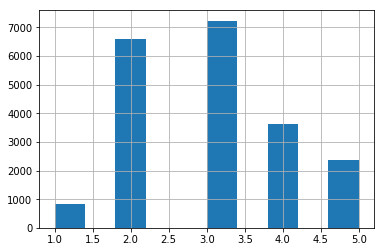

In [261]:
housing['income_cat'].hist()

### Split Train test split using stratifiedShuffleSplit based on income_cat

In [262]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    print(train_index,test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [263]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

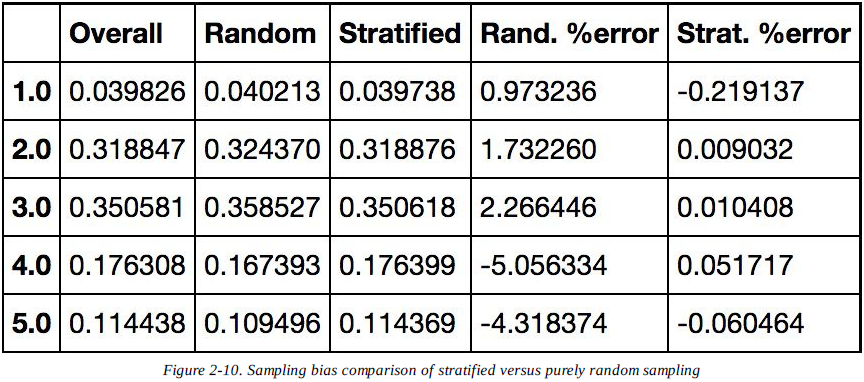

### remove the income_cat attribute so the data is back to its original state

In [264]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [265]:
housing = strat_train_set.copy()

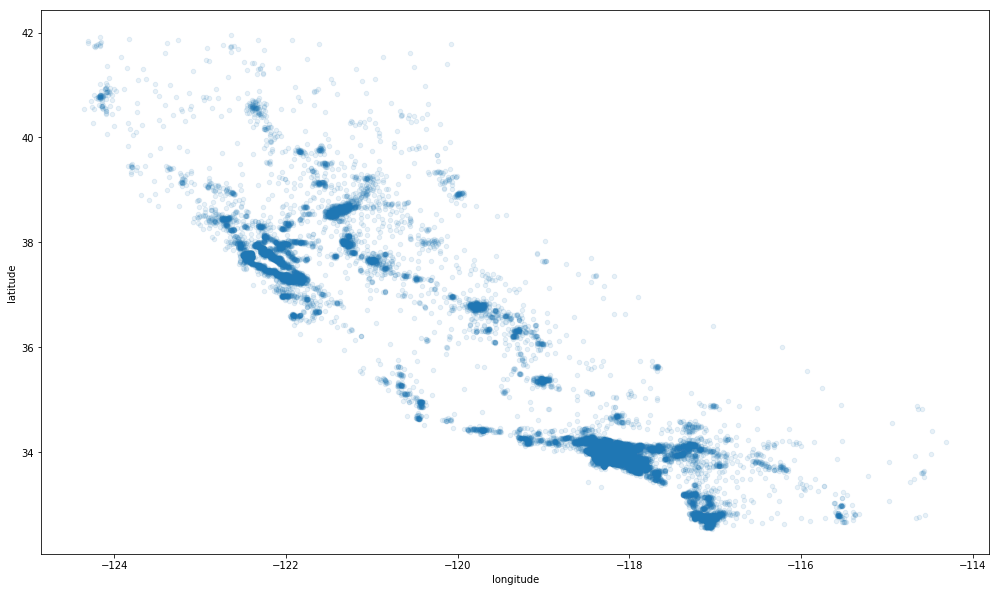

In [266]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(17,10))

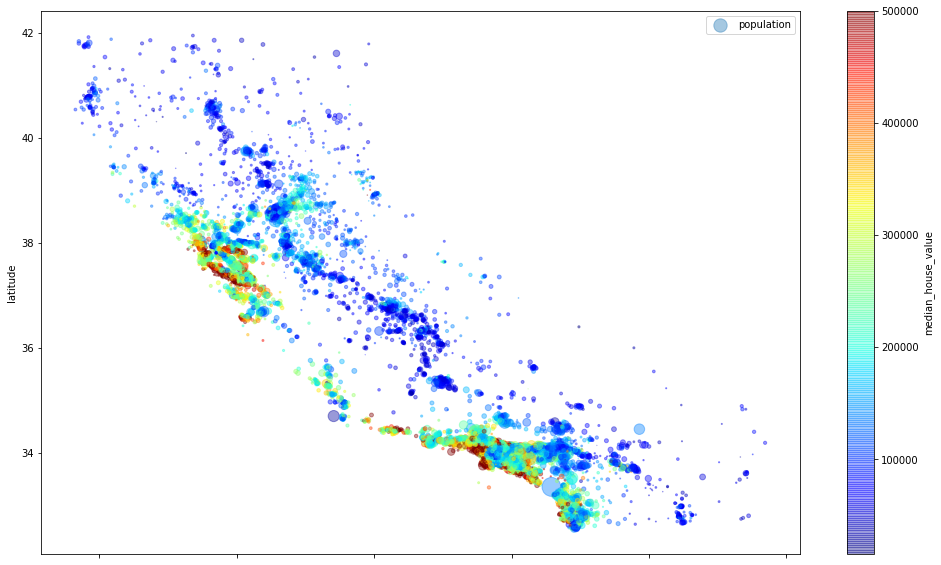

In [267]:
housing.plot(kind='scatter', x='longitude' , y='latitude' , alpha=0.4, s=housing.population /100 , label='population'\
            ,c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,figsize=(17,10))

plt.legend()

In [268]:
corr_matrix=housing.corr()

In [269]:
corr_matrix.median_house_value.sort_values(ascending=True)

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AACF44A518>,
      dtype=object)

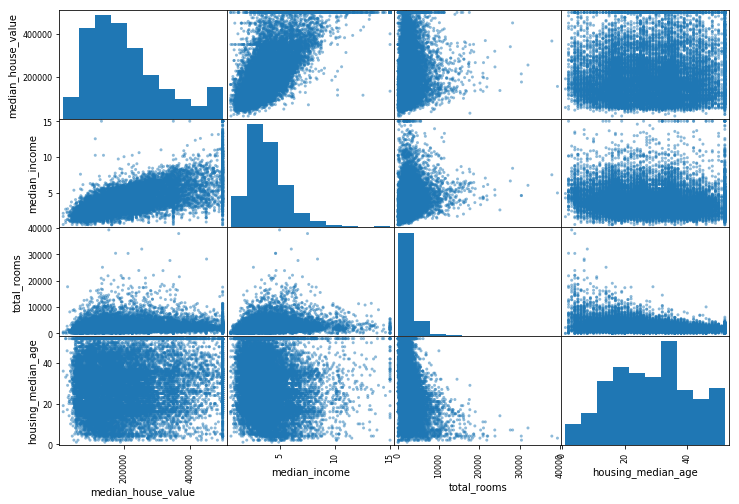

In [270]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

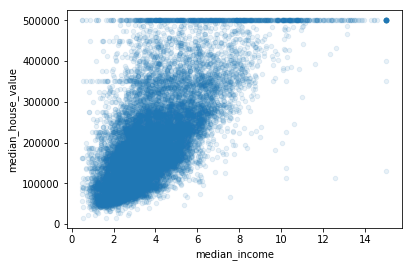

In [271]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [272]:
housing['rooms_per_household'] = housing.total_rooms/housing.households
housing['bedrooms_per_room']= housing.total_bedrooms/housing.total_rooms
housing['population_per_household']=housing.population / housing.households

In [273]:
corr_matrix2=housing.corr()
corr_matrix2['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [274]:
corr_matrix2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


### Prepare the Data for Machine Learning Algorithms

In [275]:
pd.set_option('display.max_columns', None)
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set.median_house_value.copy()

In [276]:
housing.dropna(subset=['total_bedrooms'])  ## option1
housing.drop('total_bedrooms',axis=1) ##option 2
median = housing.total_bedrooms.median()
housing.total_bedrooms.fillna(median) ## option 3

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

### Imputer which is a hadny class to take care of missing values

In [277]:
from sklearn.preprocessing import Imputer
imputer= Imputer(strategy='median')

In [278]:
## only choose numerical column
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [279]:
## show median value of eacho column
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [280]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

apply

In [281]:
x=imputer.transform(housing_num)

In [282]:
housing_tr=pd.DataFrame(x,columns=housing_num.columns)

### Handling Text and Categorical Attributes

In [283]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing.ocean_proximity
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [284]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [285]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

here housing cat 1hot is <font color='red'>sparse matrix</font>

sparse matrix to array

In [286]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### just we can this procedure by one shot using LabelBinarizer

In [287]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


<font color='red'> to make output sparse matrix</font>
Option sparse_output = True

In [288]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Custom Transformers

In [289]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [290]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

The more you
automate these data preparation steps, the more combinations you can automatically try out, making it
much more likely that you will find a great combination (and saving you a lot of time).

### Feature Scaling

In [291]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

fit + transform = fit_transform

In [292]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [293]:
DataFrameSelector(cat_attribs)

DataFrameSelector(attribute_names=['ocean_proximity'])

In [294]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

In [295]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', CustomLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [296]:
## added bed per household, five folumns from one hot encoding of ocean proximity
housing_prepared.shape

(20640, 17)

EDA analysis and applying fit transform

In [329]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Training and Evaluating on the Training Set

In [330]:
housing_prepared
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let’s try it out on a few instances from the
training set:

In [338]:
some_data= housing.iloc[:10000]
some_labels=housing_labels.iloc[:10000]
some_data_prepared= full_pipeline.transform(some_data)
print("Predictions:\t",lin_reg.predict(some_data_prepared))
# print("Labels:\t\t",list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178 ... 267138.14154015
  67785.45242391 217667.17795962]


In [343]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
line_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse =np.sqrt(line_mse)
lin_rmse

68628.19819848922

most districts’ median_housing_values
range between \$120,000 and \$265,000, so a typical prediction error of $68,628 is not very satisfying

In [344]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [345]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

it is much more likely that the model has badly overfit the data.

### Cross-Validation

In [360]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [361]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard deviation", scores.std())

In [362]:
display_scores(rmse_scores)

Scores [69678.84027362 67438.29336087 70755.56730448 70046.45703637
 69784.42851666 73668.13711316 69902.69698883 70347.74595734
 76456.53109833 68259.72316337]
Mean 70633.842081303
Standard deviation 2481.2984545655027


<font color='red'>cross-validation allows you to get not only an estimate of the
performance of your model, but also a measure of how precise this estimate</font>

In [363]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard deviation 2731.6740017983434


#### RandomForestRegressor (for less overfitting)

Random
Forests work by training many Decision Trees on <font color='red'> random subsets of the features </font>

In [367]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_rmse_score=cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
display_scores(forest_rmse_score)

Scores [-2.69579978e+09 -2.61994765e+09 -2.66841916e+09 -3.00706684e+09
 -2.70556365e+09 -3.13246768e+09 -2.56329108e+09 -2.54747305e+09
 -3.10321326e+09 -2.70003945e+09]
Mean -2774328159.848308
Standard deviation 209298984.64144996


In [364]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 3, 4], 'n_estimators': [3, 10], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

**When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).**

#### Getting best model

In [368]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it
retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

show every grid search result

In [371]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63625.2843844598 {'max_features': 2, 'n_estimators': 3}
55634.58822377922 {'max_features': 2, 'n_estimators': 10}
53064.00014491673 {'max_features': 2, 'n_estimators': 30}
61366.18842826605 {'max_features': 4, 'n_estimators': 3}
52516.28244283928 {'max_features': 4, 'n_estimators': 10}
50800.71421761648 {'max_features': 4, 'n_estimators': 30}
58971.71867165404 {'max_features': 6, 'n_estimators': 3}
52075.916316880575 {'max_features': 6, 'n_estimators': 10}
49904.92315019129 {'max_features': 6, 'n_estimators': 30}
58557.21553364549 {'max_features': 8, 'n_estimators': 3}
52518.648587273805 {'max_features': 8, 'n_estimators': 10}
49872.361089956765 {'max_features': 8, 'n_estimators': 30}
62944.92357001418 {'max_features': 2, 'n_estimators': 3, 'bootstrap': False}
54514.631552062245 {'max_features': 2, 'n_estimators': 10, 'bootstrap': False}
59785.55945239097 {'max_features': 3, 'n_estimators': 3, 'bootstrap': False}
52304.972274271255 {'max_features': 3, 'n_estimators': 10, 'bootstrap': F

**The RMSE score for this combination is 49,959, which is slightly
better than the score you got earlier using the default hyperparameter values (which was 52,634).**

### Randomized Search

when the hyperparameter search space is large, it is often preferable to use
RandomizedSearchCV instead.

* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000
different values for each hyperparameter (instead of just a few values per hyperparameter with the
grid search approach).

* You have more control over the computing budget you want to allocate to hyperparameter search,
simply by setting the number of iterations.